## Q4. Write Python code to implement the Backpropagation algorithm for ANN with more than two hidden layers. Develop two such deep models with the following configurations.
- Model 1: uses sigmoid activations at the hidden nodes and softmax activation function at the output nodes.
- Model 2: uses ReLu activation function at the hidden nodes and softmax activation function at the output nodes.
##### The hyperparameters (e.g. learning rate, momentum, number of hidden layers, number of hidden nodes per layer) for both models should be properly tuned using a validation set. Compare the performance of these two models on MNIST dataset when both the models are trained up to 1000 epochs.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Normalize the images (scale pixel values to [0,1])
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_val, y_test = to_categorical(y_train, 10), to_categorical(y_val, 10), to_categorical(y_test, 10)

# Define Model 1 with Sigmoid activation in hidden layers
def build_model1():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        Dense(32, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define Model 2 with ReLU activation in hidden layers
def build_model2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


11493376/11490434 [==============================] - 2s 0us/step


In [3]:
# Train Model 1
model1 = build_model1()
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=128, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
422/422 [==============================] - 15s 3ms/step - loss: 1.7910 - accuracy: 0.3589 - val_loss: 0.4208 - val_accuracy: 0.8790
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8938 - val_loss: 0.2549 - val_accuracy: 0.9255
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.9278 - val_loss: 0.1819 - val_accuracy: 0.9453
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1783 - accuracy: 0.9463 - val_loss: 0.1475 - val_accuracy: 0.9532
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.1312 - val_accuracy: 0.9618
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1155 - accuracy: 0.9657 - val_loss: 0.1156 - val_accuracy: 0.9648
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9695 - val_loss: 0.1090 - val_accuracy: 0.965

In [4]:
# Train Model 2
model2 = build_model2()
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, batch_size=128, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.5918 - accuracy: 0.8107 - val_loss: 0.1584 - val_accuracy: 0.9528
Epoch 2/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1404 - accuracy: 0.9577 - val_loss: 0.1431 - val_accuracy: 0.9578
Epoch 3/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9705 - val_loss: 0.1046 - val_accuracy: 0.9717
Epoch 4/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0998 - val_accuracy: 0.9722
Epoch 5/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.1048 - val_accuracy: 0.9685
Epoch 6/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9827 - val_loss: 0.1076 - val_accuracy: 0.9722
Epoch 7/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0970 - val_accuracy:

In [5]:
# Evaluate both models
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 (Sigmoid) Test Accuracy: {test_acc1:.4f}")
print(f"Model 2 (ReLU) Test Accuracy: {test_acc2:.4f}")

Model 1 (Sigmoid) Test Accuracy: 0.9783
Model 2 (ReLU) Test Accuracy: 0.9725


In [7]:
# Confusion Matrices
y_pred1 = np.argmax(model1.predict(x_test), axis=1)
y_pred2 = np.argmax(model2.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)

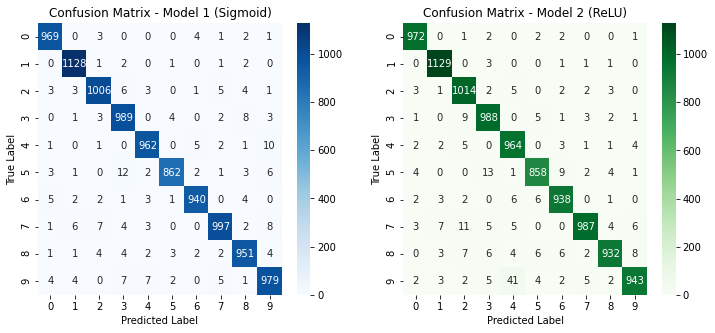

          Metric Model 1 (Sigmoid) Model 2 (ReLU)
0  Test Accuracy            0.9783         0.9725
1     Final Loss            0.0946         0.1257


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model 1 (Sigmoid)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Model 2 (ReLU)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

# Compare Model Outputs
data = {
    "Metric": ["Test Accuracy", "Final Loss"],
    "Model 1 (Sigmoid)": [f"{test_acc1:.4f}", f"{test_loss1:.4f}"],
    "Model 2 (ReLU)": [f"{test_acc2:.4f}", f"{test_loss2:.4f}"],
}
comparison_df = pd.DataFrame(data)
print(comparison_df)


## Manual one

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from scipy.special import expit  # Sigmoid function

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Normalize the images
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# One-hot encode labels
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

y_train, y_val, y_test = one_hot_encode(y_train), one_hot_encode(y_val), one_hot_encode(y_test)

# Activation functions and derivatives
def sigmoid(x):
    return expit(x)

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Xavier initialization
def xavier_init(input_size, output_size):
    limit = np.sqrt(6 / (input_size + output_size))
    return np.random.uniform(-limit, limit, (input_size, output_size))

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size, activation='sigmoid', lr=0.1):
        self.lr = lr
        self.activation = activation
        
        layer_sizes = [input_size] + hidden_layers + [output_size]
        self.weights = [xavier_init(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]
    
    def forward(self, x):
        self.a = [x]
        self.z = []
        
        for w, b in zip(self.weights, self.biases):
            z = np.dot(self.a[-1], w) + b
            self.z.append(z)
            
            if self.activation == 'sigmoid':
                a = sigmoid(z)
            elif self.activation == 'relu':
                a = relu(z)
            self.a.append(a)
        
        self.a[-1] = softmax(self.z[-1])  # Output layer activation
        return self.a[-1]
    
    def backward(self, y_true):
        grads_w = []
        grads_b = []
        
        delta = self.a[-1] - y_true
        
        for i in range(len(self.weights)-1, -1, -1):
            grads_w.insert(0, np.dot(self.a[i].T, delta))
            grads_b.insert(0, np.sum(delta, axis=0, keepdims=True))
            
            if i > 0:
                if self.activation == 'sigmoid':
                    delta = np.dot(delta, self.weights[i].T) * sigmoid_derivative(self.a[i])
                elif self.activation == 'relu':
                    delta = np.dot(delta, self.weights[i].T) * relu_derivative(self.a[i])
        
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * grads_w[i]
            self.biases[i] -= self.lr * grads_b[i]
    
    def train(self, x_train, y_train, epochs=1000, batch_size=128):
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.forward(x_batch)
                self.backward(y_batch)
            
            # Compute loss and accuracy after each epoch
            output = self.forward(x_train)
            loss = -np.mean(y_train * np.log(output + 1e-9))  # Cross-entropy loss
            predictions = np.argmax(output, axis=1)
            labels = np.argmax(y_train, axis=1)
            accuracy = np.mean(predictions == labels)
            print(f'Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
    
    def evaluate(self, x_test, y_test):
        output = self.forward(x_test)
        predictions = np.argmax(output, axis=1)
        labels = np.argmax(y_test, axis=1)
        accuracy = np.mean(predictions == labels)
        return accuracy

# Model 1: Sigmoid in hidden layers
nn1 = NeuralNetwork(input_size=28*28, hidden_layers=[128, 64, 32], output_size=10, activation='sigmoid', lr=0.5)
nn1.train(x_train.reshape(-1, 28*28), y_train, epochs=1000, batch_size=128)
acc1 = nn1.evaluate(x_test.reshape(-1, 28*28), y_test)
print(f'Model 1 (Sigmoid) Test Accuracy: {acc1:.4f}')


Epoch 1, Loss: 1.5012, Accuracy: 0.1026
Epoch 2, Loss: 1.3563, Accuracy: 0.1127
Epoch 3, Loss: 1.2776, Accuracy: 0.0985
Epoch 4, Loss: 1.2557, Accuracy: 0.1127
Epoch 5, Loss: 1.4065, Accuracy: 0.0997
Epoch 6, Loss: 1.4211, Accuracy: 0.1043
Epoch 7, Loss: 1.4413, Accuracy: 0.1026
Epoch 8, Loss: 1.3493, Accuracy: 0.0989
Epoch 9, Loss: 1.2553, Accuracy: 0.0997
Epoch 10, Loss: 1.5734, Accuracy: 0.0974
Epoch 11, Loss: 1.4169, Accuracy: 0.1026
Epoch 12, Loss: 1.3362, Accuracy: 0.1026
Epoch 13, Loss: 1.3237, Accuracy: 0.0989
Epoch 14, Loss: 1.1867, Accuracy: 0.1026
Epoch 15, Loss: 1.5000, Accuracy: 0.0989
Epoch 16, Loss: 1.3364, Accuracy: 0.1043
Epoch 17, Loss: 1.2044, Accuracy: 0.0974
Epoch 18, Loss: 1.4482, Accuracy: 0.1026
Epoch 19, Loss: 1.4199, Accuracy: 0.1026
Epoch 20, Loss: 1.5536, Accuracy: 0.1026
Epoch 21, Loss: 1.5395, Accuracy: 0.0985
Epoch 22, Loss: 1.5212, Accuracy: 0.1043
Epoch 23, Loss: 1.0686, Accuracy: 0.0975
Epoch 24, Loss: 1.6754, Accuracy: 0.1026
Epoch 25, Loss: 1.5789, A

KeyboardInterrupt: 

In [6]:
# Model 1: Sigmoid in hidden layers
nn1 = NeuralNetwork(input_size=28*28, hidden_layers=[128, 64, 32], output_size=10, activation='sigmoid', lr=0.2)
nn1.train(x_train.reshape(-1, 28*28), y_train, epochs=50, batch_size=128)
acc1 = nn1.evaluate(x_test.reshape(-1, 28*28), y_test)
print(f'Model 1 (Sigmoid) Test Accuracy: {acc1:.4f}')


Epoch 1, Loss: 0.2926, Accuracy: 0.1026
Epoch 2, Loss: 0.3128, Accuracy: 0.1026
Epoch 3, Loss: 0.2895, Accuracy: 0.1026
Epoch 4, Loss: 0.3088, Accuracy: 0.1026
Epoch 5, Loss: 0.2802, Accuracy: 0.0989
Epoch 6, Loss: 0.3327, Accuracy: 0.1026
Epoch 7, Loss: 0.3064, Accuracy: 0.1026
Epoch 8, Loss: 0.3286, Accuracy: 0.1026
Epoch 9, Loss: 0.2733, Accuracy: 0.0975
Epoch 10, Loss: 0.2782, Accuracy: 0.1127
Epoch 11, Loss: 0.3234, Accuracy: 0.1026
Epoch 12, Loss: 0.3495, Accuracy: 0.1026
Epoch 13, Loss: 0.2982, Accuracy: 0.1026
Epoch 14, Loss: 0.3090, Accuracy: 0.1026
Epoch 15, Loss: 0.3060, Accuracy: 0.1026
Epoch 16, Loss: 0.3484, Accuracy: 0.1026
Epoch 17, Loss: 0.2863, Accuracy: 0.1026
Epoch 18, Loss: 0.3064, Accuracy: 0.1026
Epoch 19, Loss: 0.3193, Accuracy: 0.0989
Epoch 20, Loss: 0.3023, Accuracy: 0.1026
Epoch 21, Loss: 0.3174, Accuracy: 0.1026
Epoch 22, Loss: 0.3352, Accuracy: 0.1026
Epoch 23, Loss: 0.2619, Accuracy: 0.0989
Epoch 24, Loss: 0.2706, Accuracy: 0.1026


KeyboardInterrupt: 

In [8]:

# Model 2: ReLU in hidden layers
nn2 = NeuralNetwork(input_size=28*28, hidden_layers=[128, 64, 32], output_size=10, activation='relu', lr=0.5)
nn2.train(x_train.reshape(-1, 28*28), y_train, epochs=1000, batch_size=128)
acc2 = nn2.evaluate(x_test.reshape(-1, 28*28), y_test)
print(f'Model 2 (ReLU) Test Accuracy: {acc2:.4f}')

Epoch 1, Loss: 1.3039, Accuracy: 0.1127
Epoch 2, Loss: 1.4882, Accuracy: 0.0997
Epoch 3, Loss: 1.2958, Accuracy: 0.1026
Epoch 4, Loss: 1.2219, Accuracy: 0.0997
Epoch 5, Loss: 1.7152, Accuracy: 0.1026
Epoch 6, Loss: 1.3885, Accuracy: 0.0975
Epoch 7, Loss: 1.5931, Accuracy: 0.0902
Epoch 8, Loss: 1.5163, Accuracy: 0.0989
Epoch 9, Loss: 1.2706, Accuracy: 0.0975
Epoch 10, Loss: 1.0804, Accuracy: 0.0985
Epoch 11, Loss: 1.3782, Accuracy: 0.0989
Epoch 12, Loss: 1.4982, Accuracy: 0.0974
Epoch 13, Loss: 1.5861, Accuracy: 0.1043
Epoch 14, Loss: 1.2871, Accuracy: 0.0981
Epoch 15, Loss: 1.6330, Accuracy: 0.1026
Epoch 16, Loss: 1.3262, Accuracy: 0.0974


KeyboardInterrupt: 

### Q6. Implement spectral clustering algorithm and test its performance on the spiral dataset. Compare this clustering results with that obtained by the simple K-means clustering algorithm

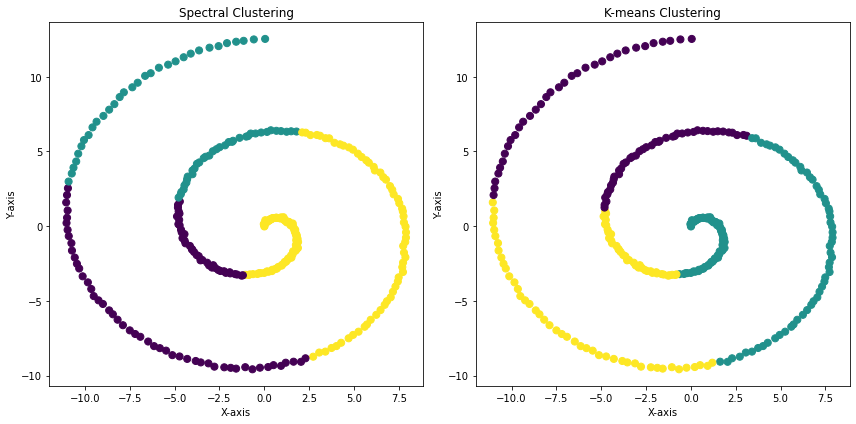

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import laplacian

# 1. Generate Spiral Dataset
def generate_spiral_data(n_samples=300, n_classes=3, noise=0.05):
    t = np.linspace(0, 4 * np.pi, n_samples)  # Create angle values
    x = np.sin(t) * t + noise * np.random.randn(n_samples)  # x = sin(t) * t + noise
    y = np.cos(t) * t + noise * np.random.randn(n_samples)  # y = cos(t) * t + noise
    return np.stack([x, y], axis=1)

# 2. Spectral Clustering Algorithm
def spectral_clustering(X, n_clusters=3):
    # Compute the distance matrix
    dist_matrix = pairwise_distances(X)
    
    # Compute the similarity matrix (Gaussian Kernel)
    W = np.exp(-dist_matrix ** 2 / (2. * np.std(dist_matrix) ** 2))
    
    # Compute the unnormalized Laplacian matrix
    L = laplacian(W, normed=True)
    
    # Compute the first 'k' eigenvectors of the Laplacian
    eigvals, eigvecs = np.linalg.eigh(L)
    idx = np.argsort(eigvals)[:n_clusters]
    
    # Use the first 'k' eigenvectors to form the new representation
    X_new = eigvecs[:, idx]
    
    # Apply k-means to the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(X_new)

# 3. K-means Clustering Algorithm
def kmeans_clustering(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(X)

# Generate data
X_spiral = generate_spiral_data(n_samples=300, n_classes=3)

# Apply Spectral Clustering
spectral_labels = spectral_clustering(X_spiral, n_clusters=3)

# Apply K-means Clustering
kmeans_labels = kmeans_clustering(X_spiral, n_clusters=3)

# Visualize the clustering results
plt.figure(figsize=(12, 6))

# Spectral Clustering Plot
plt.subplot(1, 2, 1)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=spectral_labels, cmap='viridis', s=50)
plt.title('Spectral Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# K-means Clustering Plot
plt.subplot(1, 2, 2)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.tight_layout()
plt.show()
